In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [6]:
# loading the data from csv file to a pandas dataframe

Rain_data = pd.read_csv('Rainfall_Data_Germany_Complete.csv')

print(Rain_data.columns)
print(Rain_data.dtypes)

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')
name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob          float64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir           

In [7]:
#dropping columns with object type because it can crash the algorithm

Rain_data = Rain_data.drop(columns=['datetime', 'preciptype'])  # Example only — use real names from above

In [8]:
#important columns with object type will be encoded since its needed for prediction, cant be deleted.
Rain_data['name'] = pd.factorize(Rain_data['name'])[0]
Rain_data['sunrise'] = pd.factorize(Rain_data['sunrise'])[0]
Rain_data['sunset'] = pd.factorize(Rain_data['sunset'])[0]
Rain_data['conditions'] = pd.factorize(Rain_data['conditions'])[0]
Rain_data['description'] = pd.factorize(Rain_data['description'])[0]
Rain_data['icon'] = pd.factorize(Rain_data['icon'])[0]
Rain_data['stations'] = pd.factorize(Rain_data['stations'])[0]

In [9]:
# printing the first 5 columns of the dataframe
R= Rain_data.head()
print(R)

# number of rows & columns in the dataframe
N= Rain_data.shape
print(N)

# checking for missing values
M= Rain_data.isnull().sum()
print(M)

   name  tempmax  tempmin  temp  feelslikemax  feelslikemin  feelslike   dew  \
0     0     41.7     21.0  32.0          37.8          11.2       24.6  25.3   
1     0     44.8     32.2  37.4          39.3          26.1       33.3  30.6   
2     0     33.2     30.0  32.0          29.0          19.9       23.6  27.9   
3     0     30.9     24.4  28.8          29.2          16.7       22.9  25.0   
4     0     41.9     25.8  34.0          36.8          17.2       26.9  32.4   

   humidity  precip  ...  solarenergy  uvindex  severerisk  sunrise  sunset  \
0      77.3   0.000  ...          3.1        2          10        0       0   
1      79.2   0.512  ...          0.4        0          10        1       1   
2      84.7   0.027  ...          1.6        2          10        2       2   
3      85.4   0.002  ...          0.7        0          10        3       3   
4      93.5   0.343  ...          0.5        0          10        4       4   

   moonphase  conditions  description  icon 

In [10]:
# Now extract features and labels
X = Rain_data.drop(columns=['precip']).values  # Replace with your target column name
Y = Rain_data['precip'].values

print("loook")
print(X)
print(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 2)

loook
[[  0.   41.7  21.  ...   0.    0.    0. ]
 [  0.   44.8  32.2 ...   1.    1.    1. ]
 [  0.   33.2  30.  ...   2.    1.    1. ]
 ...
 [ 25.   70.8  44.  ...  10.    3.  218. ]
 [ 25.   73.1  42.7 ...  10.    3.  224. ]
 [ 25.   78.   48.2 ...   0.    0.   43. ]]
[0.    0.512 0.027 ... 0.    0.    0.   ]


In [11]:
#Training the Linear Regression model

model = LinearRegression()
model.fit(X_train, Y_train)
# Printing the parameter values (weights & bias)
print('weights = ', model.coef_)   # The weights (coefficients) for each feature
print('bias = ', model.intercept_) # The bias (intercept)


weights =  [ 1.98725144e-03  6.27205472e-03  3.43100722e-03 -9.53209936e-03
 -4.96927982e-04 -8.94822910e-05  5.18710025e-03 -5.53149950e-03
  2.93920946e-03 -4.40959733e-04  5.61643143e-03  6.25032675e-02
  4.57219760e-03  1.61323726e-03  2.52541299e-04  3.98339058e-06
 -1.64053931e-04  1.18941086e-04 -1.49734851e-04  3.20005905e-03
 -3.53828464e-02 -2.29967279e-03 -2.01811893e-03 -1.09335521e-05
  4.61312904e-06  2.20644304e-02  2.34927043e-03 -2.75722389e-04
 -2.64294823e-03 -1.02442379e-04]
bias =  -0.10603004018945272


In [12]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)


[ 0.09277662 -0.01664526  0.33132738 ...  0.02499517 -0.00570638
  0.01245291]


In [13]:
# Its selecting index of the column for x-axis
feature_index = 11  # For example, precipcover hence it says about the x axis
print(Rain_data.columns[feature_index])
X_test_feature = X_test[:, feature_index]

precipcover


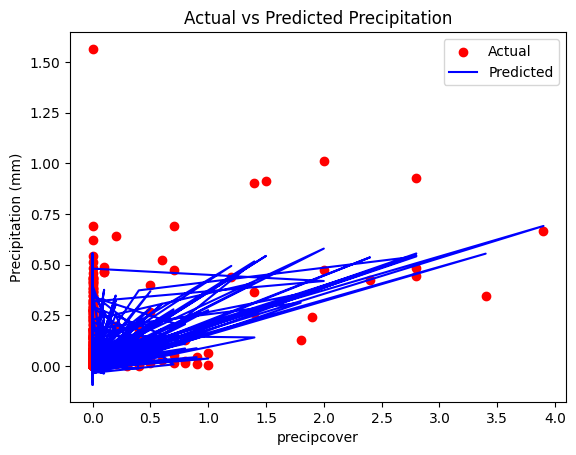

In [14]:
# plot the scatter plot
plt.scatter(X_test_feature, Y_test, color='red', label="Actual")

# Plot the predictions
plt.plot(X_test_feature, test_data_prediction, color='blue', label="Predicted")

# Adding labels and title
plt.xlabel(Rain_data.columns[feature_index])
plt.ylabel('Precipitation (mm)')
plt.title('Actual vs Predicted Precipitation')

# Add legend
plt.legend()

# Show the plot
plt.show()
